# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


https://www.kaggle.com/datasets/saugataroyarghya/resume-dataset/data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
from google.colab import files
files.upload()  # Pilih kaggle.json

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download saugataroyarghya/resume-dataset

Dataset URL: https://www.kaggle.com/datasets/saugataroyarghya/resume-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
  0% 0.00/3.69M [00:00<?, ?B/s]
100% 3.69M/3.69M [00:00<00:00, 541MB/s]


In [4]:
!unzip resume-dataset.zip

Archive:  resume-dataset.zip
  inflating: resume_data.csv         


In [2]:
df = pd.read_csv('resume_data.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Assesing dataset shape

In [3]:
df.shape

(9544, 35)

### Assesing data

In [4]:
df.head(3).T

,0,1,2
address,NaN,NaN,NaN
career_objective,Big data analytics working and database wareho...,Fresher looking to join as a data analyst and ...,NaN
skills,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...","['Data Analysis', 'Data Analytics', 'Business ...","['Software Development', 'Machine Learning', '..."
educational_institution_name,['The Amity School of Engineering & Technology...,"['Delhi University - Hansraj College', 'Delhi ...","['Birla Institute of Technology (BIT), Ranchi']"
degree_names,['B.Tech'],"['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']",['B.Tech']
passing_years,['2019'],"['2015', '2018']",['2018']
educational_results,['N/A'],"['N/A', 'N/A']",['N/A']
result_types,[None],"['N/A', 'N/A']",['N/A']
major_field_of_studies,['Electronics'],"['Mathematics', 'Statistics']",['Electronics/Telecommunication']
professional_company_names,['Coca-COla'],['BIB Consultancy'],['Axis Bank Limited']


### Check dataset info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              784 non-null    object 
 1   career_objective                     4740 non-null   object 
 2   skills                               9488 non-null   object 
 3   educational_institution_name         9460 non-null   object 
 4   degree_names                         9460 non-null   object 
 5   passing_years                        9460 non-null   object 
 6   educational_results                  9460 non-null   object 
 7   result_types                         9460 non-null   object 
 8   major_field_of_studies               9460 non-null   object 
 9   professional_company_names           9460 non-null   object 
 10  company_urls                         9460 non-null   object 
 11  start_dates                   

### Assesing null values

In [6]:
df.isna().sum()

,0
address,8760
career_objective,4804
skills,56
educational_institution_name,84
degree_names,84
passing_years,84
educational_results,84
result_types,84
major_field_of_studies,84
professional_company_names,84


### Assesing duplicates and describe data

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe(include='all')

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
count,784,4740,9488,9460,9460,9460,9460,9460,9460,9460,...,2008,2008,2008,9544,9544,8180,5457,9544,7843,9544.000000
unique,28,171,340,328,180,149,78,30,210,199,...,7,30,11,28,20,17,14,28,23,NaN
top,"Sunnyvale, CA",Big data analytics working and database wareho...,"['Python', 'MySQL', 'Tensorflow', 'Keras', 'Ma...","['Illinois Institute of Technology', 'National...",['B.Tech'],['2019'],['N/A'],['N/A'],['N/A'],"['Company Name', 'Company Name', 'Company Name']",...,[None],['N/A'],[None],Project Coordinator (Civil),Bachelor/Honors,At least 5 years,Age 25 to 40 years,Project Design\nData Analysis\nACCORD/Alliance...,AutoCAD\nCommunication and negotiation skills\...,NaN
freq,28,28,56,112,1764,1428,3612,3416,616,1204,...,1196,644,1028,342,2044,1024,1023,342,342,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660831
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167040
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683333
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.793333


### Visualization

In [61]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [63]:
skill_series = df.skills

In [64]:
# convert string to be a list
parsed_skills = skill_series.dropna().apply(ast.literal_eval)

# flatten and count frquency
all_skills = [skill.strip().lower() for sublist in parsed_skills for skill in sublist if isinstance(skill, str)]
skill_counts = Counter(all_skills) # count skills

# top 5 skills
top_5 = skill_counts.most_common(5)

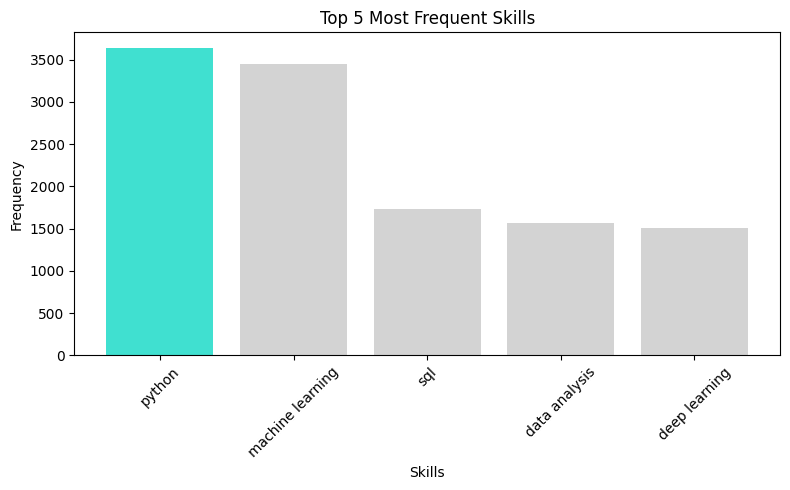

In [69]:
skills, counts = zip(*top_5)
colors = ['#40E0D0' if i == 0 else 'lightgray' for i in range(len(skills))]  # tosca hex = #40E0D0
plt.figure(figsize=(8, 5))
bars = plt.bar(skills, counts, color=colors)
plt.title("Top 5 Most Frequent Skills")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

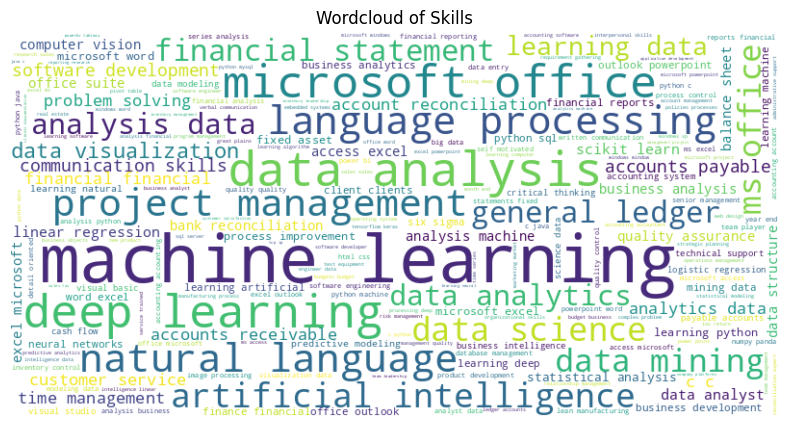

In [68]:
# Gabungkan semua skill jadi satu string
text_blob = ' '.join(all_skills)

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Skills")
plt.show()

In [73]:
position_series = df.positions

In [74]:
# convert string to be a list
parsed_positions = position_series.dropna().apply(ast.literal_eval)

# flatten and count frquency
all_positions = [position.strip().lower() for sublist in parsed_positions for position in sublist if isinstance(position, str)]
position_counts = Counter(all_positions) # count position

# top 5 position
top_5_position = position_counts.most_common(5)

In [75]:
top_5_position

[('accountant', 1148),
 ('intern', 560),
 ('senior accountant', 392),
 ('n/a', 364),
 ('staff accountant', 336)]

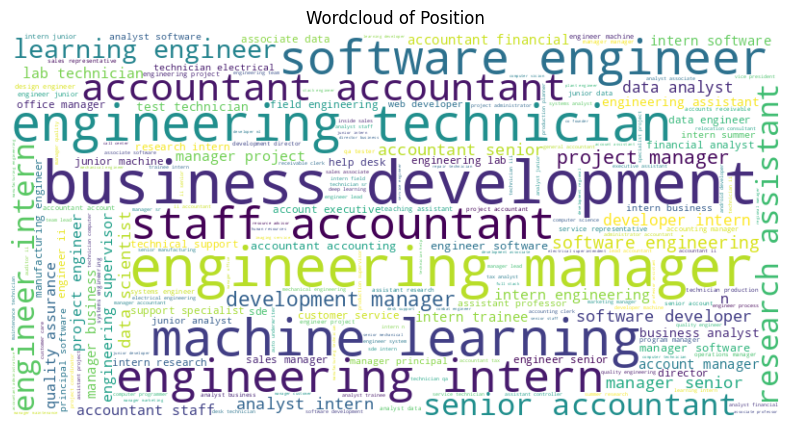

In [76]:
# Gabungkan semua position jadi satu string
text_blob = ' '.join(all_positions)

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Position")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Feature Selection

In [9]:
selected_fields = [
  'career_objective',
  'skills',
  'major_field_of_studies',
  'positions',
  'responsibilities'
]

df_selected = df[selected_fields].copy()

In [10]:
for col in df_selected.columns:
  print(f'\nUnique values in {col} column: {df_selected[col].unique()}\n')


Unique values in career_objective column: ['Big data analytics working and database warehouse manager with robust experience in handling all kinds of data. I have also used multiple cloud infrastructure services and am well acquainted with them. Currently in search of role that offers more of development.'
 'Fresher looking to join as a data analyst and junior data scientist. Experienced in creating meaningful data dashboards and evaluation models.'
 nan
 'To obtain a position in a fast-paced business office environment, demanding a strong organizational, technical, and interpersonal position utilizing my skills and attributes.'
 'Professional accountant with an outstanding work ethic and integrity seeking to make a valuable contribution utilizing strong analytical, organizational, communication, and computer skills.'
 'To secure an IT specialist, desktop support, network administration, database administrator, technical support specialist or related position with a growing organizati

```
"['N/A']" "['Economics']"
 "['Electrical Engineering Specialized in Computer Science', 'N/A', 'N/A']"
```

ada di 2 kolom

### Handling nan data

In [11]:
df_selected.isna().sum()

,0
career_objective,4804
skills,56
major_field_of_studies,84
positions,84
responsibilities,0


#### Handling nan in skills

In [12]:
df_selected[df_selected.skills.isna()].head()

,career_objective,skills,major_field_of_studies,positions,responsibilities
107,NaN,NaN,"['Computer Science', 'Computer Science']","['Professor Emerytus', 'Professor', 'Director ...",Relationship Building\nHR Collaboration\nPolic...
228,NaN,NaN,"['Computer Science', 'Computer Science']","['Professor Emerytus', 'Professor', 'Director ...",Design Creation\nCAD Drawings\nDesign Optimiza...
353,NaN,NaN,"['Computer Science', 'Computer Science']","['Professor Emerytus', 'Professor', 'Director ...",Open-Source Technologies\nCI/CD Culture & Tool...
405,To utilize my customer relations and managemen...,NaN,['Accounting'],"['Accountant', 'Director of Finance & Accounts...",Database Design & Development\nSQL Query Optim...
428,To utilize my customer relations and managemen...,NaN,['Accounting'],"['Accountant', 'Director of Finance & Accounts...",Supervision\nMonitoring\nConstruction\nEstimat...


In [13]:
df_selected[df_selected.skills.isna()].groupby(by='positions').size()

,0
positions,
"['Accountant', 'Director of Finance & Accounts', 'Training & Operations Consultant', 'Franchisee', 'General Manager', 'Patient Service Representative']",28
"['Professor Emerytus', 'Professor', 'Director of Graduate Studies', 'Associate Professor', 'Associate Professor', 'Assistant Professor', 'Visiting Assistant Professor', 'Assistant Professor', 'Teaching and Research Assistant']",28


In [14]:
# Pilih subset data dengan skills NaN
df_skills_nan = df_selected[df_selected.skills.isna()].copy()

# Isi NaN dengan string kosong agar tidak error saat groupby
df_skills_nan['career_objective'] = df_skills_nan['career_objective'].fillna("")
df_skills_nan['skills'] = df_skills_nan['skills'].fillna("")

# Tentukan kolom yang dianggap mewakili satu orang
group_cols = ['career_objective', 'skills', 'major_field_of_studies', 'positions']

# Groupby dan gabungkan semua responsibilities unik
df_grouped = df_skills_nan.groupby(group_cols).agg({
    'responsibilities': lambda x: list(set(x.dropna()))
}).reset_index()

In [15]:
df_selected = df_selected.dropna(subset=['skills'])

In [16]:
df_cleaned_skills = pd.concat([df_selected, df_grouped], ignore_index=True)

In [17]:
df_cleaned_skills.isna().sum()

,0
career_objective,4776
skills,0
major_field_of_studies,84
positions,84
responsibilities,0


#### Handling nan in positions

In [18]:
df_cleaned_skills[df_cleaned_skills.positions.isna()].head()

,career_objective,skills,major_field_of_studies,positions,responsibilities
186,Fresher Computer vision and Machine Learning E...,"['Machine learning', 'Deep learning', 'Compute...",['Computer Science'],NaN,"Full Stack Development\nFront-end: ReactJS, Ne..."
246,I am a Master of Data Science graduate looking...,"['Software Development', 'Client Management', ...","['Computers', 'Data Science']",NaN,Application Development\nObject-Oriented Desig...
273,I am a Master of Data Science graduate looking...,"['Software Development', 'Client Management', ...","['Computers', 'Data Science']",NaN,Machinery Maintenance\nTroubleshooting\nReport...
336,Fresher Computer vision and Machine Learning E...,"['Machine learning', 'Deep learning', 'Compute...",['Computer Science'],NaN,Mushak Forms Maintenance\nVAT Software & MS Of...
396,NaN,"['Skill 1', 'Skill 3', 'Skill 5', 'Skill 2', '...",['Name of Major'],NaN,Mushak Forms Maintenance\nVAT Software & MS Of...


keliatan ada dummy value, tiap baris dummy semua kolomnya jg dummy. agar tidak dikira value unique, maka lebih baik di ignore, berdasarkan responsibilities terlihat data ini berasal dari index baris 336

In [19]:
df_positions_nan = df_cleaned_skills[df_cleaned_skills.positions.isna()].copy()

In [20]:
df_positions_nan.groupby('career_objective').size()

,0
career_objective,
Fresher Computer vision and Machine Learning Engineer looking for a job that is both challenging and fun in terms of problem-solving. Also an expert in maintaining and managing Tableau and Power BI dashboards to address business.,28
"I am a Master of Data Science graduate looking to work as a fulltime employee, seeking an entry level role in data science domain. I can offer a strong programming skills and good academic results together with a sound knowledge of implementing Machine learning techniques. Also, I am keen to learn new skill sets that the role demands. I am a highly analytical individual with interpersonal and technical skills, a desire to learn and determined attitude to succeed.",28


In [21]:
# Isi NaN dengan string kosong agar tidak error saat groupby
df_positions_nan['positions'] = df_positions_nan['positions'].fillna("")

# Tentukan kolom yang dianggap mewakili satu orang
group_cols = ['career_objective', 'skills', 'major_field_of_studies', 'positions']

# Groupby dan gabungkan semua responsibilities unik
df_grouped = df_positions_nan.groupby(group_cols).agg({
    'responsibilities': lambda x: list(set(x.dropna()))
}).reset_index()

In [22]:
df_cleaned_positions = pd.concat([df_cleaned_skills, df_grouped], ignore_index=True)

In [23]:
df_cleaned_positions = df_cleaned_positions.dropna(subset=['positions'])

In [24]:
df_cleaned_positions.isna().sum()

,0
career_objective,4748
skills,0
major_field_of_studies,84
positions,0
responsibilities,0


#### Handling nan in major field of studies

In [25]:
df_cleaned_positions[df_cleaned_positions.major_field_of_studies.isna()].head()

,career_objective,skills,major_field_of_studies,positions,responsibilities
191,NaN,"['Technical Support', 'Telecom Support', 'Netw...",NaN,"['Corporate Engineering Support Technician', '...",Machine Learning Leadership\nCross-Functional ...
245,NaN,"['Technical Support', 'Telecom Support', 'Netw...",NaN,"['Corporate Engineering Support Technician', '...",Design Review\nCoordination\nProposal Preparat...
410,NaN,"['Technical Support', 'Telecom Support', 'Netw...",NaN,"['Corporate Engineering Support Technician', '...",Mushak Forms Maintenance\nVAT Software & MS Of...
504,NaN,"['Technical Support', 'Telecom Support', 'Netw...",NaN,"['Corporate Engineering Support Technician', '...",Design Creation\nCAD Drawings\nDesign Optimiza...
707,NaN,"['Microsoft Excel, Project and Visio', 'Adobe'...",NaN,"['Biomedical Engineering Technician II', 'Nutr...",Apparel Sourcing\nQuality Garment Sourcing\nRe...


In [26]:
df_major_field_of_studies_nan = df_cleaned_positions[df_cleaned_positions.major_field_of_studies.isna()].copy()

In [27]:
df_major_field_of_studies_nan.groupby(by='positions').size()

,0
positions,
"['Biomedical Engineering Technician II', 'Nutrition Clerk', 'Manager/Assistant Service Coordinator', 'Receptionist']",28
"['Corporate Engineering Support Technician', 'Help Desk Support Analyst II']",28
"['Facilities Engineering Manager', 'Field Engineering Supervisor', 'Chief Plant Engineer', 'Nuclear Inspector', 'Submariner']",28


In [28]:
# Isi NaN dengan string kosong agar tidak error saat groupby
df_major_field_of_studies_nan['career_objective'] = df_major_field_of_studies_nan['career_objective'].fillna("")
df_major_field_of_studies_nan['major_field_of_studies'] = df_major_field_of_studies_nan['major_field_of_studies'].fillna("")

# Tentukan kolom yang dianggap mewakili satu orang
group_cols = ['career_objective', 'skills', 'major_field_of_studies', 'positions']

# Groupby dan gabungkan semua responsibilities unik
df_grouped = df_major_field_of_studies_nan.groupby(group_cols).agg({
    'responsibilities': lambda x: list(set(x.dropna()))
}).reset_index()

In [29]:
df_cleaned = pd.concat([df_cleaned_positions, df_grouped], ignore_index=True)

In [30]:
df_cleaned = df_cleaned.dropna(subset=['major_field_of_studies'])

In [31]:
df_cleaned.isna().sum()

,0
career_objective,4664
skills,0
major_field_of_studies,0
positions,0
responsibilities,0


### Data Cleaning

In [32]:
df_cleaned.head()

,career_objective,skills,major_field_of_studies,positions,responsibilities
0,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['Electronics'],['Big Data Analyst'],Technical Support\nTroubleshooting\nCollaborat...
1,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Mathematics', 'Statistics']",['Business Analyst'],Machine Learning Leadership\nCross-Functional ...
2,NaN,"['Software Development', 'Machine Learning', '...",['Electronics/Telecommunication'],['Software Developer (Machine Learning Enginee...,"Trade Marketing Executive\nBrand Visibility, S..."
3,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...",['Computer Applications'],"['Accountant', 'Accounts Receivable Clerk', 'M...",Apparel Sourcing\nQuality Garment Sourcing\nRe...
4,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Accounting'],"['Staff Accountant', 'Senior Accountant', 'Tax...",iOS Lifecycle\nRequirement Analysis\nNative Fr...


In [ ]:
import pandas as pd
import numpy as np
import ast  # buat parsing array-string
import re

def clean_text(text):
    if isinstance(text, list):
        # If it's a list, clean each item and join them
        cleaned_items = [clean_text(item) for item in text]
        return ", ".join(cleaned_items)
    if pd.isna(text):
        return ""
    text = str(text).strip().lower()
    # Hilangkan nilai tidak bermakna
    if text in ["n/a", "na", "none", "-", "null"]:
        return ""
    text = str(text).replace("\n", ", ").replace("\r", ", ").replace("\t", " ")
    # Ganti tanda slash yang berada di antara kata dengan koma
    text = re.sub(r'\s*/\s*', ', ', text)
    # Hilangkan tanda baca dobel atau berulang (,, ;; .. -- ++)
    text = re.sub(r'([,;:\.\-])\s*\1+', r'\1', text)  # ganti ,, ;; .. jadi satu
    # Hapus kombinasi tidak lazim seperti ,., atau .,, jadi satu koma/titik saja
    text = re.sub(r'([,;:\.])[\s]*([,;:\.])+', r'\1', text)
    # Hilangkan spasi berlebih
    text = re.sub(r'\s+', ' ', text)
    # Hapus koma/titik di awal/akhir string
    text = text.strip(" ,.;:-")
    return text.strip()

def parse_list_column(col):
    # Konversi string list seperti "['A', 'B']" jadi list python asli
    def clean_list(x):
        try:
            if pd.isna(x) or x == "":
                return ""
            # Attempt to parse the string as a list
            parsed = ast.literal_eval(x) if isinstance(x, str) else x
            if isinstance(parsed, list):
                # Filter out None and empty strings before joining
                return ", ".join([
                    str(item).strip()
                    for item in parsed
                    if item is not None and str(item).strip() != ""
                ])
            else:
                return str(parsed).strip()
        except (ValueError, SyntaxError):
            # If literal_eval fails, treat it as a single string and clean it
            return clean_text(x)
        except Exception:
            return ""

    return col.apply(clean_list)

In [34]:
# --- Parsing & Cleaning ---
df_cleaned["skills"] = parse_list_column(df_cleaned["skills"])
df_cleaned["major_field_of_studies"] = parse_list_column(df_cleaned["major_field_of_studies"])
df_cleaned["positions"] = parse_list_column(df_cleaned["positions"])

df_cleaned["career_objective"] = df_cleaned["career_objective"].apply(clean_text)
df_cleaned["skills"] = df_cleaned["skills"].apply(clean_text)
df_cleaned["major_field_of_studies"] = df_cleaned["major_field_of_studies"].apply(clean_text)
df_cleaned["positions"] = df_cleaned["positions"].apply(clean_text)
df_cleaned["responsibilities"] = df_cleaned["responsibilities"].apply(clean_text)

### Rename Column

In [35]:
# rename
df_cleaned.rename(columns={"positions": "previous_positions"}, inplace=True)

### Make New Feature

Contains with combined all columns

In [36]:
df_cleaned["resume_text"] = df_cleaned.apply(
    lambda x: ", ".join([
        f"Objective: {x['career_objective']}" if x["career_objective"] else "",
        f"Skills: {x['skills']}" if x["skills"] else "",
        f"Field of studies: {x['major_field_of_studies']}" if x["major_field_of_studies"] else "",
        f"Previous positions: {x['previous_positions']}" if x["previous_positions"] else "",
        f"Responsibilities: {x['responsibilities']}" if x["responsibilities"] else ""
    ]).strip(", "), axis=1
)

### Reset Index

In [79]:
df_cleaned.reset_index(drop=True, inplace=True)

### Labeling

In [39]:
ds_keywords = [
    # Core Concepts
    "machine learning", "deep learning", "neural networks", "supervised learning", "unsupervised learning",
    "reinforcement learning", "semi-supervised learning", "transfer learning",

    # NLP & CV
    "natural language processing", "nlp", "named entity recognition", "text classification",
    "sentiment analysis", "question answering", "text generation", "transformers", "bert", "gpt",
    "llm", "language model", "huggingface", "tokenization", "word embeddings", "word2vec", "doc2vec",
    "computer vision", "image classification", "object detection", "ocr", "semantic segmentation",

    # Tools & Libraries
    "tensorflow", "pytorch", "keras", "sklearn", "scikit-learn", "xgboost", "lightgbm", "catboost",
    "numpy", "pandas", "matplotlib", "seaborn", "openai", "opencv", "nltk", "spacy", "gensim",

    # Data Handling & Analysis
    "data cleaning", "data preprocessing", "data wrangling", "feature selection",
    "feature engineering", "exploratory data analysis", "eda", "statistical analysis",
    "hypothesis testing", "anova", "chi square", "correlation", "regression", "classification",
    "clustering", "kmeans", "dbscan", "hierarchical clustering", "time series", "forecasting",
    "arima", "prophet", "seasonal decomposition", "lag features", "rolling mean",

    # Programming & Querying
    "python", "r programming", "sql", "mongodb", "nosql", "spark", "pyspark", "hadoop", "r"

    # MLOps
    "mlops", "model deployment", "model monitoring", "model drift", "airflow", "kubeflow", "mlflow",
    "docker", "kubernetes", "dvc", "fastapi", "flask", "api deployment", "cloud deployment",
    "ci/cd", "gcp", "aws", "azure", "vertex ai", "sagemaker", "databricks",

    # Data Infrastructure
    "data lake", "data warehouse", "bigquery", "snowflake", "etl", "elt", "data pipeline",
    "data ingestion", "data modeling", "data governance", "data validation",

    # Visualization & BI
    "power bi", "tableau", "superset", "dash", "streamlit", "plotly", "looker", "data visualization",

    # Roles / Titles
    "data scientist", "data science", "data analyst", "business intelligence", "bi analyst",
    "ml engineer", "ai engineer", "research scientist", "llm engineer", "ml researcher",
    "data engineer", "research engineer", "analytics engineer",

    # GenAI / Advanced
    "generative ai", "discriminative model", "vae", "gan", "cnn", "rnn", "lstm", "gru",
    "bayesian", "monte carlo", "ensemble learning", "boosting", "bagging", "random forest",

    # Mathematics / Statistics
    "statistics", "probability", "linear algebra", "calculus", "optimization", "gradient descent",
    "logistic regression", "decision tree", "support vector machine", "svm", "dimensionality reduction",
    "pca", "tsne", "umap",

    # Engineering Patterns
    "pipeline", "scalable model", "batch inference", "real-time prediction", "streaming data",
    "distributed computing", "vector database", "pinecone", "chromadb", "faiss"
]

In [40]:
# Fungsi pelabelan (versi ketat)
def label(text):
    if not isinstance(text, str) or not text.strip():
        return 'Not Relevant to be a Data Scientist'
    text_lower = text.lower()
    match_count = sum(kw in text_lower for kw in ds_keywords)
    return 'Relevant to be a Data Scientist' if match_count >= 4 else 'Not Relevant to be a Data Scientist'

# Tambahkan kolom label
df_cleaned['label'] = df_cleaned['resume_text'].apply(label)

In [80]:
df_cleaned.label.value_counts()

,count
label,
Relevant to be a Data Scientist,4866
Not Relevant to be a Data Scientist,4461


In [84]:
df.shape, df_cleaned.shape

((9544, 35), (9327, 7))

In [83]:
df_cleaned[df_cleaned.label == 'Relevant to be a Data Scientist'][['resume_text', 'label']].head()

,resume_text,label
0,Objective: big data analytics working and data...,Relevant to be a Data Scientist
1,Objective: fresher looking to join as a data a...,Relevant to be a Data Scientist
2,"Skills: software development, machine learning...",Relevant to be a Data Scientist
6,"Skills: machine learning, linear regression, r...",Relevant to be a Data Scientist
8,Objective: certified data analyst with a degre...,Relevant to be a Data Scientist


### Encode Labels

In [ ]:
df_cleaned['label'] = df_cleaned['label'].map(lambda x: {'Relevant to be a Data Scientist': 1, 'Not Relevant to be a Data Scientist': 0}.get(x, x))

### Save to be cvs file

In [43]:
df_cleaned[["resume_text", "label"]].to_csv('labeled_resumes.csv', index=False)